# IMPORT LIBRARY

In [1]:
import pandas as pd
import re
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# LOAD DATASET

In [3]:
# Load dataset
df = pd.read_csv('news.csv')

print(df[['text', 'label']].head())

                                                text    label
0  Farmers will get subsidies for turning fields ...  politic
1  Vanuatu bans non-biodegradable plastic to prot...  politic
2  Ex-British PM Tony Blair ups calls for Labour ...  politic
3  UK's Tony Blair argues voters deserve another ...  politic
4  Germany had so much renewable energy over Chri...  politic


In [4]:
# Tampilkan jumlah data awal per kelas
print("Jumlah baris data per kelas")
print(df['label'].value_counts())

Jumlah baris data per kelas
label
politic       53762
science       39041
technology    34590
Name: count, dtype: int64


In [5]:
# Jumlah baris data
num_rows = len(df)
print("Total jumlah baris data: ", num_rows)

Total jumlah baris data:  127393


# PREPROCESSING

## Missing Value Removal

In [6]:
# Hapus data dengan nilai kosong
df.dropna(subset=['text', 'label'], inplace=True)

# Jumlah baris data
num_rows = len(df)
print("Total jumlah baris data: ", num_rows)

Total jumlah baris data:  127375


## Text Normalization

In [7]:
# Lowercase
df['text'] = df['text'].str.lower()

# Symbol, Number & Special Character Removal
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Stopwords Removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(df[['text', 'label']].head())

                                                text    label
0  farmers get subsidies turning fields back wild...  politic
1  vanuatu bans nonbiodegradable plastic protect ...  politic
2  exbritish pm tony blair ups calls labour back ...  politic
3  uks tony blair argues voters deserve another s...  politic
4  germany much renewable energy christmas pay pe...  politic


## Label Encoding

In [8]:
# Label Encoding
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

print(df[['text', 'label']].head())

                                                text  label
0  farmers get subsidies turning fields back wild...      0
1  vanuatu bans nonbiodegradable plastic protect ...      0
2  exbritish pm tony blair ups calls labour back ...      0
3  uks tony blair argues voters deserve another s...      0
4  germany much renewable energy christmas pay pe...      0


## Split Data Training & Data Testing

In [9]:
# Menentukan fitur dan label
X = df['text']  # Fitur
y = df['label'] # Label

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 101900
Jumlah data testing: 25475


# MODEL DEVELOPMENT

## Bag of Words

In [11]:
# Vectorization
vectorizer = CountVectorizer()

# Data Training Vectorization
X_train = vectorizer.fit_transform(X_train)

# Data Testing Vectorization
X_test = vectorizer.transform(X_test)

## Model Training

In [12]:
# Melatih model
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# MODEL EVALUATION

In [13]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     10829
           1       0.86      0.85      0.85      7790
           2       0.77      0.78      0.78      6856

    accuracy                           0.85     25475
   macro avg       0.84      0.84      0.84     25475
weighted avg       0.85      0.85      0.85     25475



# SAVE MODEL & IMPLEMENTATION

In [14]:
# Save Model
joblib.dump(model, 'logistic_regression_model.pkl')

df['logistic_regression'] = model.predict(vectorizer.transform(df['text']))

df.to_csv('news_logres.csv', index=False)

# VISUALIZATION

In [15]:
# Load dataset
df = pd.read_csv('news_logres.csv')

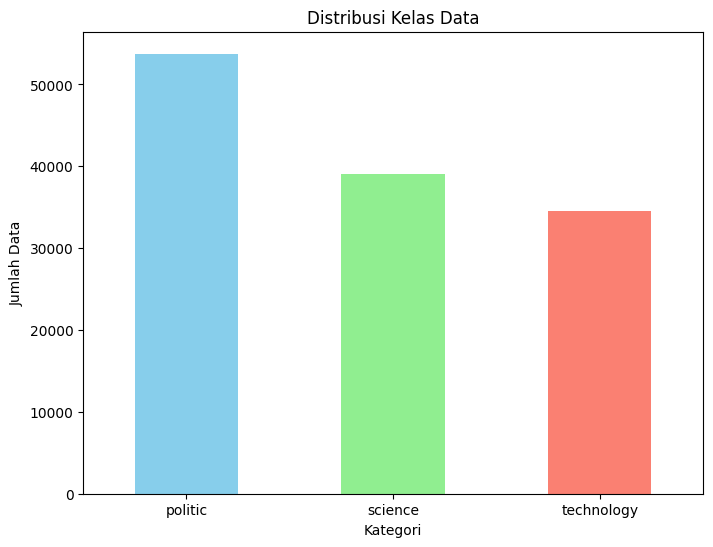

In [16]:
label_mapping = {0: 'politic', 1: 'science', 2: 'technology'}

df['label'] = df['label'].map(label_mapping)

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribusi Kelas Data')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Menghitung jumlah data per kelas
label_counts = df['label'].value_counts()

# Print jumlah data per kelas
print("Jumlah data per kelas:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Jumlah data per kelas:
politic: 53749
science: 39038
technology: 34588


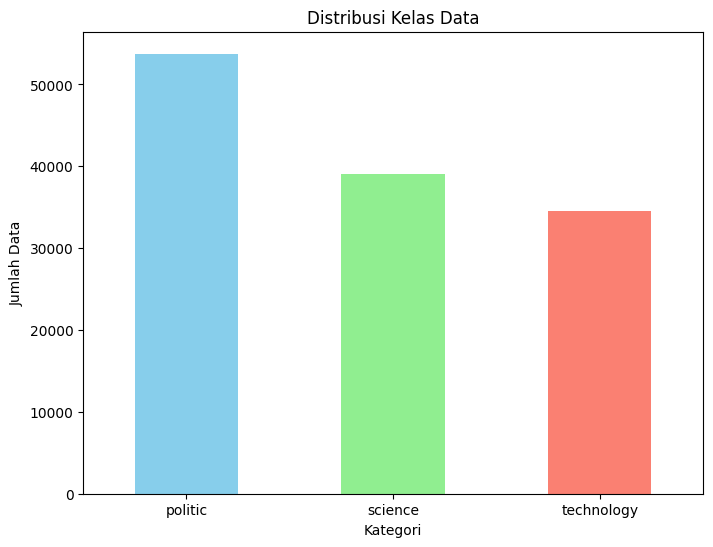

In [18]:
logistic_regresssion_mapping = {0: 'politic', 1: 'science', 2: 'technology'}

df['logistic_regression'] = df['logistic_regression'].map(logistic_regresssion_mapping)

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribusi Kelas Data')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Menghitung jumlah data per kelas
logres_counts = df['logistic_regression'].value_counts()

# Print jumlah data per kelas
print("Jumlah data per kelas:")
for label, count in logres_counts.items():
    print(f"{label}: {count}")

Jumlah data per kelas:
politic: 53588
science: 39316
technology: 34471
